In [1]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

#### HSV Color Space

![](https://answers.opencv.org/upfiles/15186766673210035.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

### Filtering Colors in the Image
- A technique which helps to find only the speciified color into and image, it allows to remove the non required color and generate a mask for the image 
- this technique can be used in the scenario where we have to focus or track a particular color of object,


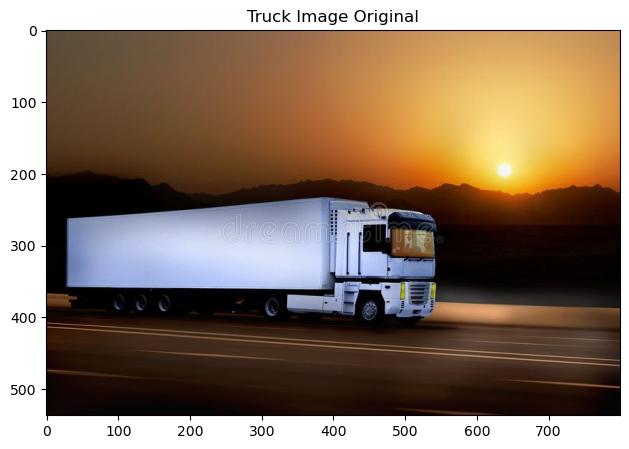

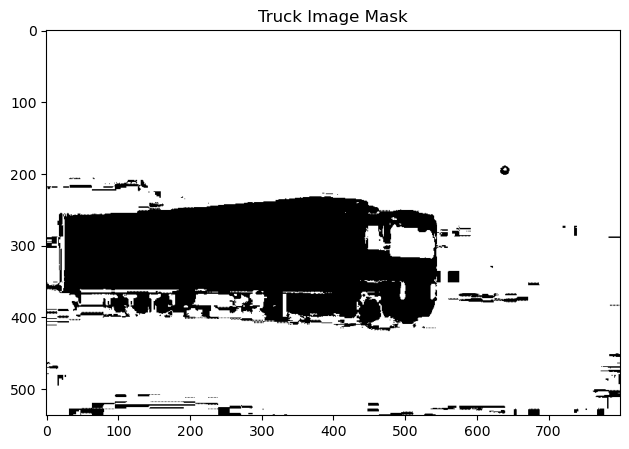

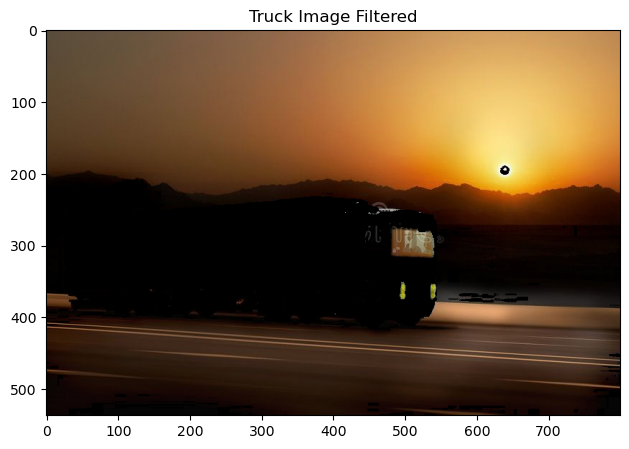

In [11]:
path = 'images/truck_image.jpg'
img = cv2.imread(path)
show_image(img, "Truck Image Original", 5)

lower_th = np.array([0, 0, 0])
upper_th = np.array([40, 255, 255])
# choose the lower and upper threshold as per the color you want to filter form an image
# it is good when you have fixed color set and want to perform some activity like when you want to track a ball of color red
# you have to filter out the red color and track the ball over frames

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_img, lower_th, upper_th) # this function return the binary image with if the pixel in range it is white else black

final_img = cv2.bitwise_and(img, img, mask = mask)

show_image(mask, "Truck Image Mask", 5)

show_image(final_img, "Truck Image Filtered", 5)



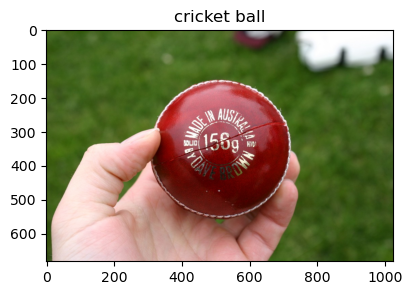

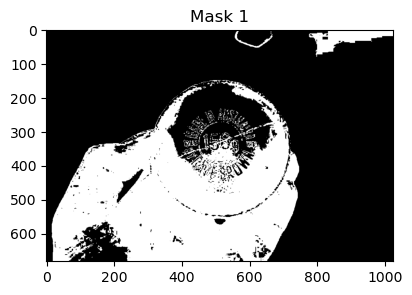

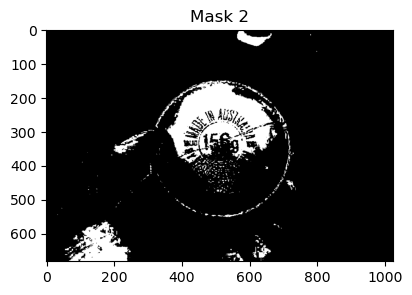

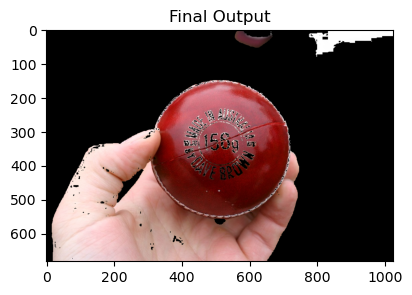

In [15]:
# for our image let's use the red filter 
# you have noticed that the red color not in the one direction like
# it is from 0 to 15 appro and 180 to 165 appro
# for this let's do the color filtering

path = 'images/cricket_ball.jpg'
img = cv2.imread(path)

# let's convert the image into hsv color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# let's define the ranges for our filter
lower_th = np.array([0,0,0])
upper_th = np.array([10,255,255])
mask1 = cv2.inRange(hsv_img, lower_th, upper_th)

# now let's define the mask for 180 - 165 red color value
lower_th = np.array([165,0,0])
upper_th = np.array([180,255,255])
mask2 = cv2.inRange(hsv_img, lower_th, upper_th)

# in order to use both mask we have to add them 
mask = mask1 + mask2

# lets find the final result 
final_img = cv2.bitwise_and(img, img, mask = mask)

show_image(img, "cricket ball", 3)
show_image(mask1 , "Mask 1", 3)
show_image(mask2 , "Mask 2", 3)
show_image(final_img , "Final Output", 3)

# in the last image you can observe that we can succefully filter the ball from the image
# this can be more accurate by combinint different methods such as noise reduction and bluring

